# Capstone Project - Battle of Neighborhoods

## Relocating to London with Family - Find the best areas

### Data Source for Borough List with its demographics including Employment, Happiness, Education 

#### Define and import pre-requisites for Python - Pandas and Data Scraping using BeautifulSoup

In [1]:
from bs4 import BeautifulSoup # Beautiful Soup Data scraping library
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # Pandas data analsysis library
import requests # HTTP library
from sklearn.cluster import KMeans # Data clustering algorithm

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('All Libraries are imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.3.0               |           py36_0         747 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be 

### Scraping Data from Open Website - Wikipedia.

#### scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_London_boroughs , in order to obtain the data that is in the table

In [2]:
List_url = "https://en.wikipedia.org/wiki/List_of_London_boroughs#List_of_boroughs_and_local_authorities"
source = requests.get(List_url).text

In [3]:
soup = BeautifulSoup(source, 'lxml')
table = soup.find('table')
soup.encode("utf-8-sig")
print(soup.title)

<title>List of London boroughs - Wikipedia</title>


#### The columns not used would be dropped and data in the colums cleaned

In [4]:
Borough = []
Population = []
Area = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        Borough.append(cells[0].text.rstrip('\n'))
        Area.append(cells[6].text.rstrip('\n'))
        Population.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

In [5]:
dict = {'Borough' : Borough,
       'Population' : Population,
       'Area': Area,
       'Coordinates': Coordinates}
wiki = pd.DataFrame.from_dict(dict)
wiki.head(4)

,Borough,Population,Area,Coordinates
0,Barking and Dagenham [note 1],"194,352",13.93,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",33.49,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",23.38,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",16.70,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...


### Data Cleaning to remove Blank or unassigned Borough

In [6]:
wiki['Borough'] = wiki['Borough'].map(lambda x: x.rstrip(']'))
wiki['Borough'] = wiki['Borough'].map(lambda x: x.rstrip('1234567890.'))
wiki['Borough'] = wiki['Borough'].str.replace('note','')
wiki['Borough'] = wiki['Borough'].map(lambda x: x.rstrip(' ['))
wiki.head(4)

,Borough,Population,Area,Coordinates
0,Barking and Dagenham,"194,352",13.93,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",33.49,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",23.38,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",16.70,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...


In [7]:
wiki[['Coordinates1','Coordinates2','Coordinates3']] = wiki['Coordinates'].str.split('/',expand=True)
wiki.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
wiki[['Latitude','Longitude']] = wiki['Coordinates3'].str.split(';',expand=True)

In [8]:
wiki.drop(labels=['Coordinates3'], axis=1,inplace = True)
wiki['Latitude'] = wiki['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
wiki['Latitude'] = wiki['Latitude'].map(lambda x: x.lstrip())
wiki['Longitude'] = wiki['Longitude'].map(lambda x: x.rstrip(')'))
wiki['Longitude'] = wiki['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
wiki['Longitude'] = wiki['Longitude'].map(lambda x: x.rstrip(' ('))
wiki['Longitude'] = wiki['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
wiki['Longitude'] = wiki['Longitude'].map(lambda x: x.lstrip())
wiki['Population'] = wiki['Population'].str.replace(',','')

#### List the Size of Data and first 4 rows from imported data

In [9]:
print('The DataFrame shape is', wiki.shape)
wiki.head(32)

The DataFrame shape is (32, 5)


,Borough,Population,Area,Latitude,Longitude
0,Barking and Dagenham,194352,13.93,51.5607,0.1557
1,Barnet,369088,33.49,51.6252,-0.1517
2,Bexley,236687,23.38,51.4549,0.1505
3,Brent,317264,16.70,51.5588,-0.2817
4,Bromley,317899,57.97,51.4039,0.0198
5,Camden,229719,8.40,51.5290,-0.1255
6,Croydon,372752,33.41,51.3714,-0.0977
7,Ealing,342494,21.44,51.5130,-0.3089
8,Enfield,320524,31.74,51.6538,-0.0799
9,Greenwich,264008,18.28,51.4892,0.0648


In [10]:
wiki['Population'] = wiki['Population'].str.replace(',','')
wiki.head(4)

,Borough,Population,Area,Latitude,Longitude
0,Barking and Dagenham,194352,13.93,51.5607,0.1557
1,Barnet,369088,33.49,51.6252,-0.1517
2,Bexley,236687,23.38,51.4549,0.1505
3,Brent,317264,16.70,51.5588,-0.2817


In [11]:
wiki['Population'] = wiki['Population'].astype(float)
wiki['Area'] = wiki['Area'].astype(float)

wiki['Density'] = wiki['Population'] / wiki['Area']

wiki.round(1)

wiki.head(4)

,Borough,Population,Area,Latitude,Longitude,Density
0,Barking and Dagenham,194352.0,13.93,51.5607,0.1557,13952.045944
1,Barnet,369088.0,33.49,51.6252,-0.1517,11020.842042
2,Bexley,236687.0,23.38,51.4549,0.1505,10123.481608
3,Brent,317264.0,16.70,51.5588,-0.2817,18997.844311


#### Plot sorted data

In [12]:
import matplotlib.pyplot as plt
wiki.set_index('Borough')['Density'].sort_values().tail(5).plot(kind='barh', grid=True, figsize=(15,4), color='coral')
plt.xlabel('Popultion Density')
plt.title('Population Density by Borough')
plt.show()

<Figure size 1500x400 with 1 Axes>

#### Print the number of rows of dataframe using ".shape" option

In [13]:
print('The DataFrame shape is', wiki.shape)

The DataFrame shape is (32, 6)


# Data Set Part 2 - Importing London Borough with Demographics Data

#### Data is used from London website to be used for the project

In [14]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

Lon= pd.read_excel('https://data.london.gov.uk/dataset/london-borough-profiles/resource/80647ce7-14f3-4e31-b1cd-d5f7ea3553be/download', sheet_name='Data')

print("Column headings:")
print(Lon.columns)

Column headings:
Index(['Code', 'New code', 'Area name', 'Inner/ Outer London',
       'GLA Population Estimate 2017', 'GLA Household Estimate 2017',
       'Inland Area (Hectares)', 'Population density (per hectare) 2017',
       'Average Age, 2017', 'Proportion of population aged 0-15, 2015',
       'Proportion of population of working-age, 2015',
       'Proportion of population aged 65 and over, 2015',
       'Net internal migration (2015)', 'Net international migration (2015)',
       'Net natural change (2015)',
       '% of resident population born abroad (2015)',
       'Largest migrant population by country of birth (2011)',
       '% of largest migrant population (2011)',
       'Second largest migrant population by country of birth (2011)',
       '% of second largest migrant population (2011)',
       'Third largest migrant population by country of birth (2011)',
       '% of third largest migrant population (2011)',
       '% of population from BAME groups (2016)',
       

In [15]:
print('The DataFrame shape is', Lon.shape)
Lon.head(4)

The DataFrame shape is (40, 85)


,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,E09000001,City of London,Inner London,8800.0,5325.82,290.393,30.3037,43.2,11.4,...,5.99,5.57,NaN,2.637945,128.833,.,.,.,.,.
2,E09000002,E09000002,Barking and Dagenham,Outer London,209000.0,78188.4,3610.78,57.8822,32.9,27.2,...,7.05,3.05,28.542,7.272108,227.605,Lab,0,100,0,36.4974
3,E09000003,E09000003,Barnet,Outer London,389600.0,151423,8674.83,44.9115,37.3,21.1,...,7.37,2.75,20.6579,6.026084,133.77,Cons,50.7937,.,1.5873,40.481


In [16]:
Lon.columns = Lon.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Lon.columns = Lon.columns.str.replace('%', '').str.replace('/', '_').str.replace('-', '').str.replace(',', '_')

In [17]:
Lon.columns = Lon.columns.str.replace('__', '_')

In [18]:
print(Lon.columns)

Index(['code', 'new_code', 'area_name', 'inner_outer_london',
       'gla_population_estimate_2017', 'gla_household_estimate_2017',
       'inland_area_hectares', 'population_density_per_hectare_2017',
       'average_age_2017', 'proportion_of_population_aged_015_2015',
       'proportion_of_population_of_workingage_2015',
       'proportion_of_population_aged_65_and_over_2015',
       'net_internal_migration_2015', 'net_international_migration_2015',
       'net_natural_change_2015', '_of_resident_population_born_abroad_2015',
       'largest_migrant_population_by_country_of_birth_2011',
       '_of_largest_migrant_population_2011',
       'second_largest_migrant_population_by_country_of_birth_2011',
       '_of_second_largest_migrant_population_2011',
       'third_largest_migrant_population_by_country_of_birth_2011',
       '_of_third_largest_migrant_population_2011',
       '_of_population_from_bame_groups_2016',
       '_people_aged_3+_whose_main_language_is_not_english_2011_censu

#### Cleaning the Data

In [19]:
Lon.drop(["code", "new_code","gla_population_estimate_2017","inland_area_hectares", "population_density_per_hectare_2017", "proportion_of_seats_won_by_conservatives_in_2014_election", "proportion_of_seats_won_by_labour_in_2014_election", "proportion_of_seats_won_by_lib_dems_in_2014_election", "turnout_at_2014_local_elections", "largest_migrant_population_arrived_during_2015_16", "second_largest_migrant_population_arrived_during_2015_16", "third_largest_migrant_population_arrived_during_2015_16"], axis = 1, inplace = True)
Lon.dropna(subset=['inner_outer_london'], inplace=True)

In [20]:
Lon=Lon.sort_values('area_name', ascending=True)
Lon.head(4)

,area_name,inner_outer_london,gla_household_estimate_2017,average_age_2017,proportion_of_population_aged_015_2015,proportion_of_population_of_workingage_2015,proportion_of_population_aged_65_and_over_2015,net_internal_migration_2015,net_international_migration_2015,net_natural_change_2015,...,female_life_expectancy_201214,teenage_conception_rate_2014,life_satisfaction_score_201114_out_of_10,worthwhileness_score_201114_out_of_10,happiness_score_201114_out_of_10,anxiety_score_201114_out_of_10,childhood_obesity_prevalance_2015_16,people_aged_17+_with_diabetes_,mortality_rate_from_causes_considered_preventable_2012_14,political_control_in_council
2,Barking and Dagenham,Outer London,78188.4,32.9,27.2,63.1,9.7,-1176,2509,2356,...,82.1,32.4,7.14,7.60,7.05,3.05,28.542,7.272108,227.605,Lab
3,Barnet,Outer London,151423,37.3,21.1,64.9,14.0,-3379,5407,2757,...,85.1,12.8,7.48,7.76,7.37,2.75,20.6579,6.026084,133.77,Cons
4,Bexley,Outer London,97735.8,39.0,20.6,62.9,16.6,413,760,1095,...,84.4,19.5,7.38,7.70,7.21,3.29,22.7093,6.859383,164.286,Cons
5,Brent,Outer London,121048,35.6,20.9,67.8,11.3,-7739,7640,3372,...,85.1,18.5,7.25,7.35,7.22,2.92,24.3444,7.920348,169.356,Lab


In [21]:
Lon.rename(columns={'area_name': 'Borough'}, inplace=True)

In [22]:
print('The DataFrame shape is', Lon.shape)

The DataFrame shape is (33, 73)


In [23]:
print(Lon.columns)

Index(['Borough', 'inner_outer_london', 'gla_household_estimate_2017',
       'average_age_2017', 'proportion_of_population_aged_015_2015',
       'proportion_of_population_of_workingage_2015',
       'proportion_of_population_aged_65_and_over_2015',
       'net_internal_migration_2015', 'net_international_migration_2015',
       'net_natural_change_2015', '_of_resident_population_born_abroad_2015',
       'largest_migrant_population_by_country_of_birth_2011',
       '_of_largest_migrant_population_2011',
       'second_largest_migrant_population_by_country_of_birth_2011',
       '_of_second_largest_migrant_population_2011',
       'third_largest_migrant_population_by_country_of_birth_2011',
       '_of_third_largest_migrant_population_2011',
       '_of_population_from_bame_groups_2016',
       '_people_aged_3+_whose_main_language_is_not_english_2011_census',
       'overseas_nationals_entering_the_uk_nino_2015_16',
       'new_migrant_nino_rates_2015_16', 'employment_rate_2015',
    

#### Merge two tables using column "Borough" as the common thread. Display and verify the merged contents.

In [24]:
Lonboro = wiki.join(Lon.set_index('Borough'), on='Borough')

In [25]:
Lonboro.head(4)

,Borough,Population,Area,Latitude,Longitude,Density,inner_outer_london,gla_household_estimate_2017,average_age_2017,proportion_of_population_aged_015_2015,...,female_life_expectancy_201214,teenage_conception_rate_2014,life_satisfaction_score_201114_out_of_10,worthwhileness_score_201114_out_of_10,happiness_score_201114_out_of_10,anxiety_score_201114_out_of_10,childhood_obesity_prevalance_2015_16,people_aged_17+_with_diabetes_,mortality_rate_from_causes_considered_preventable_2012_14,political_control_in_council
0,Barking and Dagenham,194352.0,13.93,51.5607,0.1557,13952.045944,Outer London,78188.4,32.9,27.2,...,82.1,32.4,7.14,7.60,7.05,3.05,28.542,7.272108,227.605,Lab
1,Barnet,369088.0,33.49,51.6252,-0.1517,11020.842042,Outer London,151423,37.3,21.1,...,85.1,12.8,7.48,7.76,7.37,2.75,20.6579,6.026084,133.77,Cons
2,Bexley,236687.0,23.38,51.4549,0.1505,10123.481608,Outer London,97735.8,39.0,20.6,...,84.4,19.5,7.38,7.70,7.21,3.29,22.7093,6.859383,164.286,Cons
3,Brent,317264.0,16.70,51.5588,-0.2817,18997.844311,Outer London,121048,35.6,20.9,...,85.1,18.5,7.25,7.35,7.22,2.92,24.3444,7.920348,169.356,Lab


# Assignment Part 3 - Explore and Cluster neighborhoods. Generate Maps.

### Explore and Cluster the neighborhoods in London. Analyse and Report Observations. Visualise to find how the neighborhoods cluster together. Use of Four Square to Get Venues.

### Filter the data for Neighborhood around London Borough

### Define Four Square Credentials for connection

In [26]:
CLIENT_ID = 'RBXPFBH4ZFHE2M5ANPHVYSQJPNODSYV0GWMYP3OMKPN3I1R2'
CLIENT_SECRET = 'OC2Q1YVHIOWIKHEXYBY5TTAE4PCT4GFHBKCPDKLSQUG2RZXN'
VERSION = '20180604'
LIMIT = 30
print('Your credentails passed with Four Square Version : ' +  VERSION )

Your credentails passed with Four Square Version : 20180604


In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    Lon_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    Lon_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(Lon_venues)

In [29]:
LIMIT = 40
Lon_venues = getNearbyVenues(names=Lonboro['Borough'],
                                   latitudes=Lonboro['Latitude'],
                                   longitudes=Lonboro['Longitude']
                                  )
Lon_venues.head()

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons Becontree Heath,51.559774,0.148752,Supermarket


In [30]:
Lon_venues.rename(columns={'Borough Latitude': 'Borough_lat', 'Borough Longitude': 'Borough_long', 'Venue Latitude': 'Venue_lat', 'Venue Longitude': 'Venue_long', 'Venue Category': 'Venue_cat'  }, inplace=True)

### Analyse data by visualising it on multiple queries.

#### List all unique venues London Boroughs Dataframe together with total number of venues.

In [31]:
Lon_venues.Venue_cat.unique()
print('The total number of venues returned is ', Lon_venues.shape[0])

The total number of venues returned is  997


In [32]:
Lon_venues.groupby('Borough').count()

,Borough_lat,Borough_long,Venue,Venue_lat,Venue_long,Venue_cat
Borough,,,,,,
Barking and Dagenham,7,7,7,7,7,7
Barnet,3,3,3,3,3,3
Bexley,27,27,27,27,27,27
Brent,40,40,40,40,40,40
Bromley,40,40,40,40,40,40
Camden,40,40,40,40,40,40
Croydon,40,40,40,40,40,40
Ealing,40,40,40,40,40,40
Enfield,40,40,40,40,40,40


### List top 10 venues from each Borough

In [33]:
# one hot encoding
lon_hot = pd.get_dummies(Lon_venues[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lon_hot['Borough'] = Lon_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [lon_hot.columns[-1]] + list(lon_hot.columns[:-1])
lon_hot = lon_hot[fixed_columns]

lon_grouped = lon_hot.groupby('Borough').mean().reset_index()

In [34]:
# set number of clusters
k = 5

lon_cluster = lon_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(lon_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40]

array([3, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 0, 1, 1, 1, 1, 4,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = lon_grouped['Borough']

for ind in np.arange(lon_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lon_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Beacontree Heath Leisure Centre,Dagenham Swimming Pool,Becontree Heath Bus Station,Robert Clack Leisure Centre,Crowlands Heath Golf Course,Morrisons Becontree Heath,Central Park,Grange Wellington Hotel,Gourmet Burger Kitchen,Goodlooking Optics
1,Barnet,Beaconsfield Road (BF),The Atrium,Oakleigh Cafe,German Gymnasium,Granger & Co.,Grange Wellington Hotel,Gourmet Burger Kitchen,Goodlooking Optics,Golden Lion,Godiva
2,Bexley,Frankie & Benny's,The Furze Wren (Wetherspoon),Lidl,Argos,TK Maxx,Sainsbury's,Wilko,Boots,Prince Albert,Nando's
3,Brent,Starbucks,wagamama,Premier Inn London Wembley Stadium,Wembley Stadium,Moulin Cafe,Novotel London Wembley,Black Sheep Coffee,Bobby Moore Club,Bobby Moore Statue,Boxpark Wembley
4,Bromley,Costa Coffee,Caffè Nero,wagamama,Hotel Chocolat,Krispy Kreme,Barrel & Horn,Nando's,Next,O'Neill's,UNIQLO


In [37]:
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [39]:
lon_boro_all = Lonboro.join(borough_venues_sorted.set_index('Borough'), on='Borough')

lon_boro_all.head()

,Borough,Population,Area,Latitude,Longitude,Density,inner_outer_london,gla_household_estimate_2017,average_age_2017,proportion_of_population_aged_015_2015,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,194352.0,13.93,51.5607,0.1557,13952.045944,Outer London,78188.4,32.9,27.2,...,Beacontree Heath Leisure Centre,Dagenham Swimming Pool,Becontree Heath Bus Station,Robert Clack Leisure Centre,Crowlands Heath Golf Course,Morrisons Becontree Heath,Central Park,Grange Wellington Hotel,Gourmet Burger Kitchen,Goodlooking Optics
1,Barnet,369088.0,33.49,51.6252,-0.1517,11020.842042,Outer London,151423,37.3,21.1,...,Beaconsfield Road (BF),The Atrium,Oakleigh Cafe,German Gymnasium,Granger & Co.,Grange Wellington Hotel,Gourmet Burger Kitchen,Goodlooking Optics,Golden Lion,Godiva
2,Bexley,236687.0,23.38,51.4549,0.1505,10123.481608,Outer London,97735.8,39.0,20.6,...,Frankie & Benny's,The Furze Wren (Wetherspoon),Lidl,Argos,TK Maxx,Sainsbury's,Wilko,Boots,Prince Albert,Nando's
3,Brent,317264.0,16.70,51.5588,-0.2817,18997.844311,Outer London,121048,35.6,20.9,...,Starbucks,wagamama,Premier Inn London Wembley Stadium,Wembley Stadium,Moulin Cafe,Novotel London Wembley,Black Sheep Coffee,Bobby Moore Club,Bobby Moore Statue,Boxpark Wembley
4,Bromley,317899.0,57.97,51.4039,0.0198,5483.853717,Outer London,140602,40.2,19.9,...,Costa Coffee,Caffè Nero,wagamama,Hotel Chocolat,Krispy Kreme,Barrel & Horn,Nando's,Next,O'Neill's,UNIQLO


#### Convert Datatypes of the columns to correct type

In [41]:
lon_boro_all.dtypes

Borough                                                                                            object
Population                                                                                        float64
Area                                                                                              float64
Latitude                                                                                           object
Longitude                                                                                          object
Density                                                                                           float64
inner_outer_london                                                                                 object
gla_household_estimate_2017                                                                        object
average_age_2017                                                                                  float64
proportion_of_population_aged_015_2015        

In [42]:
lon_boro_all[['Latitude', 'Longitude', 'male_employment_rate_2015', 'female_employment_rate_2015', 'homes_owned_outright_2014_','unemployment_rate_2015']] = Lonboro[['Latitude', 'Longitude', 'male_employment_rate_2015', 'female_employment_rate_2015', 'homes_owned_outright_2014_','unemployment_rate_2015']].astype('float64')

In [43]:
print('%',lon_boro_all[['Borough', 'unemployment_rate_2015']][lon_boro_all.unemployment_rate_2015 == lon_boro_all.unemployment_rate_2015.max()])

%                 Borough  unemployment_rate_2015
0  Barking and Dagenham                    11.0


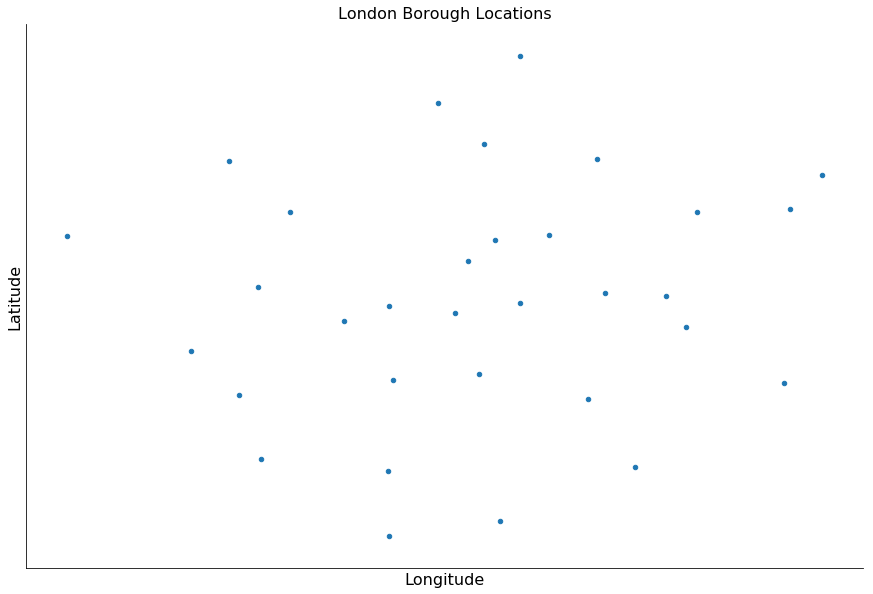

In [44]:
import matplotlib.pyplot as plt

X = lon_boro_all[['Longitude', 'Latitude']]
scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('London Borough Locations', fontsize=16)
scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})

plt.show()

#### Using the Segmenting and Clustering the analysis can help in Real Estate decision making, Banking and Finance solution / offers rollout along with insurances, Security systems implementation, Planning Emergency and Rescue systems.

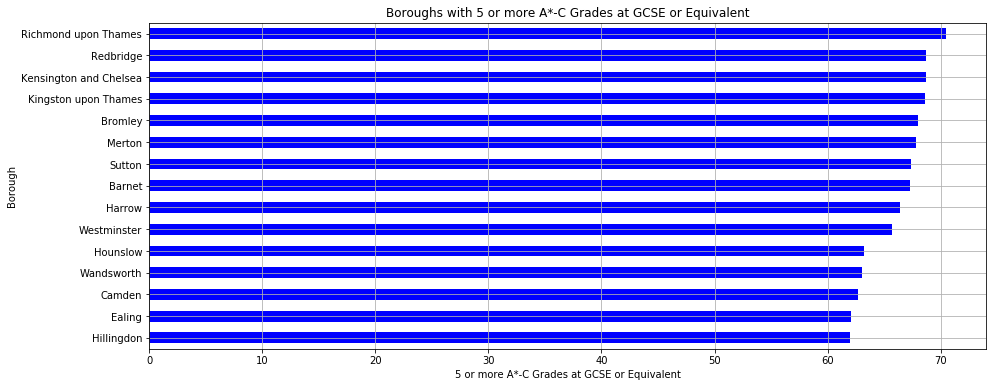

In [45]:
import matplotlib.pyplot as plt
lon_boro_all.set_index('Borough')['achievement_of_5_or_more_a*_c_grades_at_gcse_or_equivalent_including_english_and_maths_2013_14'].sort_values().tail(15).plot(kind='barh', grid=True, figsize=(15,6), color='blue')
plt.xlabel('5 or more A*-C Grades at GCSE or Equivalent')
plt.title('Boroughs with 5 or more A*-C Grades at GCSE or Equivalent')
plt.show()

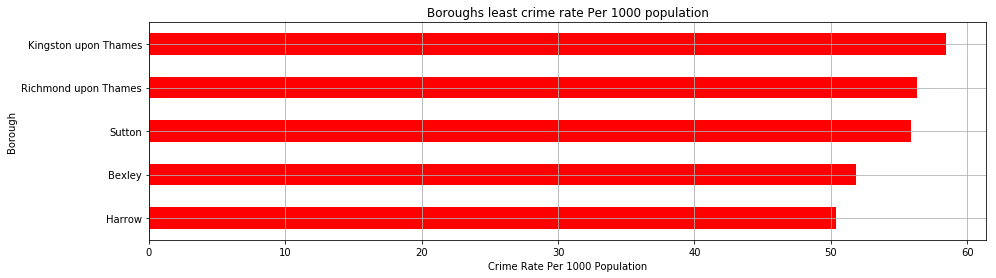

In [46]:
import matplotlib.pyplot as plt
lon_boro_all.set_index('Borough')['crime_rates_per_thousand_population_2014_15'].sort_values().head(5).plot(kind='barh', grid=True, figsize=(15,4), color='red')
plt.xlabel('Crime Rate Per 1000 Population')
plt.title('Boroughs least crime rate Per 1000 population')
plt.show()

In [101]:
wt_score = lon_boro_all[['Borough','Latitude','Longitude','unemployment_rate_2015','achievement_of_5_or_more_a*_c_grades_at_gcse_or_equivalent_including_english_and_maths_2013_14','life_satisfaction_score_201114_out_of_10','median_house_price_2015','average_public_transport_accessibility_score_2014','crime_rates_per_thousand_population_2014_15']].copy()
wt_score.head(5)

,Borough,Latitude,Longitude,unemployment_rate_2015,achievement_of_5_or_more_a*_c_grades_at_gcse_or_equivalent_including_english_and_maths_2013_14,life_satisfaction_score_201114_out_of_10,median_house_price_2015,average_public_transport_accessibility_score_2014,crime_rates_per_thousand_population_2014_15
0,Barking and Dagenham,51.5607,0.1557,11.0,58,7.14,243500,2.97063,83.3591
1,Barnet,51.6252,-0.1517,8.5,67.3,7.48,445000,2.9967,62.7384
2,Bexley,51.4549,0.1505,7.6,60.3,7.38,275000,2.55213,51.8279
3,Brent,51.5588,-0.2817,7.5,60.1,7.25,407250,3.65371,78.8019
4,Bromley,51.4039,0.0198,5.3,68,7.54,374975,2.77986,64.1336


In [102]:
wt_score['Employment'] = 1-((wt_score['unemployment_rate_2015'])/10)
wt_score['Life'] = (wt_score['life_satisfaction_score_201114_out_of_10']) / 10
wt_score['Transport'] = (wt_score['average_public_transport_accessibility_score_2014']) / 10
wt_score['School'] = (wt_score['achievement_of_5_or_more_a*_c_grades_at_gcse_or_equivalent_including_english_and_maths_2013_14'])/100
wt_score['Safety'] = 1-((wt_score['crime_rates_per_thousand_population_2014_15'])/100)
wt_score.head(5)

,Borough,Latitude,Longitude,unemployment_rate_2015,achievement_of_5_or_more_a*_c_grades_at_gcse_or_equivalent_including_english_and_maths_2013_14,life_satisfaction_score_201114_out_of_10,median_house_price_2015,average_public_transport_accessibility_score_2014,crime_rates_per_thousand_population_2014_15,Employment,Life,Transport,School,Safety
0,Barking and Dagenham,51.5607,0.1557,11.0,58,7.14,243500,2.97063,83.3591,-0.10,0.714,0.297063,0.58,0.166409
1,Barnet,51.6252,-0.1517,8.5,67.3,7.48,445000,2.9967,62.7384,0.15,0.748,0.29967,0.673,0.372616
2,Bexley,51.4549,0.1505,7.6,60.3,7.38,275000,2.55213,51.8279,0.24,0.738,0.255213,0.603,0.481721
3,Brent,51.5588,-0.2817,7.5,60.1,7.25,407250,3.65371,78.8019,0.25,0.725,0.365371,0.601,0.211981
4,Bromley,51.4039,0.0198,5.3,68,7.54,374975,2.77986,64.1336,0.47,0.754,0.277986,0.68,0.358664


In [103]:
wt_score.drop(['unemployment_rate_2015','achievement_of_5_or_more_a*_c_grades_at_gcse_or_equivalent_including_english_and_maths_2013_14','average_public_transport_accessibility_score_2014', 'life_satisfaction_score_201114_out_of_10','crime_rates_per_thousand_population_2014_15'], inplace=True, axis=1)

In [104]:
wt_score.head(5)

,Borough,Latitude,Longitude,median_house_price_2015,Employment,Life,Transport,School,Safety
0,Barking and Dagenham,51.5607,0.1557,243500,-0.10,0.714,0.297063,0.58,0.166409
1,Barnet,51.6252,-0.1517,445000,0.15,0.748,0.29967,0.673,0.372616
2,Bexley,51.4549,0.1505,275000,0.24,0.738,0.255213,0.603,0.481721
3,Brent,51.5588,-0.2817,407250,0.25,0.725,0.365371,0.601,0.211981
4,Bromley,51.4039,0.0198,374975,0.47,0.754,0.277986,0.68,0.358664


In [105]:
wt_score['Weight'] = wt_score['School'] + wt_score['Employment'] + wt_score['Life'] + wt_score['Transport'] + wt_score['Safety']
wt_score.sort_values(by='Weight', ascending = False)

,Borough,Latitude,Longitude,median_house_price_2015,Employment,Life,Transport,School,Safety,Weight
25,Richmond upon Thames,51.4479,-0.3260,575000,0.62,0.754,0.305746,0.705,0.436522,2.82127
13,Harrow,51.5898,-0.3346,396150,0.54,0.733,0.28702,0.664,0.496039,2.72006
22,Merton,51.4014,-0.1958,415000,0.54,0.728,0.340559,0.678,0.402528,2.68909
19,Kingston upon Thames,51.4085,-0.3064,410000,0.55,0.734,0.292825,0.686,0.415443,2.67827
27,Sutton,51.3618,-0.1945,320000,0.45,0.746,0.285409,0.674,0.441439,2.59685
8,Enfield,51.6538,-0.0799,320000,0.62,0.726,0.297149,0.599,0.306261,2.54841
4,Bromley,51.4039,0.0198,374975,0.47,0.754,0.277986,0.68,0.358664,2.54065
30,Wandsworth,51.4567,-0.1910,557000,0.43,0.737,0.425902,0.63,0.274401,2.4973
16,Hounslow,51.4746,-0.3680,355000,0.57,0.731,0.303052,0.632,0.208443,2.4445
6,Croydon,51.3714,-0.0977,300000,0.59,0.710,0.322408,0.577,0.229649,2.42906


In [107]:
wt_score['Weight'] = wt_score['Weight'].astype(float)

### Results

In [108]:
Top5 = wt_score.nlargest(5, ['Weight'])

In [109]:
Top5.head()

,Borough,Latitude,Longitude,median_house_price_2015,Employment,Life,Transport,School,Safety,Weight
25,Richmond upon Thames,51.4479,-0.3260,575000,0.62,0.754,0.305746,0.705,0.436522,2.821268
13,Harrow,51.5898,-0.3346,396150,0.54,0.733,0.28702,0.664,0.496039,2.720059
22,Merton,51.4014,-0.1958,415000,0.54,0.728,0.340559,0.678,0.402528,2.689087
19,Kingston upon Thames,51.4085,-0.3064,410000,0.55,0.734,0.292825,0.686,0.415443,2.678268
27,Sutton,51.3618,-0.1945,320000,0.45,0.746,0.285409,0.674,0.441439,2.596847


In [113]:
import folium
from geopy.geocoders import Nominatim
address = 'London, UK'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The GPS coordinate of London are {}, {}.'.format(latitude, longitude))



The GPS coordinate of London are 51.5073219, -0.1276474.


In [114]:
map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough in zip(Top5['Latitude'], Top5['Longitude'], Top5['Borough']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.9,
        parse_html=False).add_to(map)  
    
map